In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os
import seaborn as sns
#Dataset Directory
training_dir = "Dataset/Dataset Gabungan/Training"
validation_dir = "Dataset/Dataset Gabungan/Validation"

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Image Normalization and Image Augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      rotation_range=0.1,
      fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(training_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size=32,
                                                              class_mode  = 'categorical',
                                                              target_size = (150, 150))

train_generator.class_indices

Found 3915 images belonging to 3 classes.
Found 978 images belonging to 3 classes.


{'Covid-19': 0, 'Normal': 1, 'Tuberculosis': 2}

# **Training first Model with my own architectur (Model C)**

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                  

In [10]:
#Learning Rate Scheduler
from tensorflow.keras.optimizers.schedules import PolynomialDecay

num_epochs = 100
num_train_steps = (train_generator.samples // 32) * num_epochs
lr_scheduler = PolynomialDecay(
    initial_learning_rate=5e-5, end_learning_rate=0.0,
    decay_steps=num_train_steps
)

In [11]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=lr_scheduler), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks (Optional)
# class MyCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if (logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.95):
#       print('Good enough accuracy so cancelling training!')
#       self.model.stop_training = True

# callback = MyCallback()

#Training Proccess
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // 32,
    verbose = 2
    # callbacks=[callback]
)

Epoch 1/100
122/122 - 70s - loss: 1.0271 - accuracy: 0.4906 - val_loss: 0.9943 - val_accuracy: 0.5875 - 70s/epoch - 572ms/step
Epoch 2/100
122/122 - 41s - loss: 0.8731 - accuracy: 0.6276 - val_loss: 0.8890 - val_accuracy: 0.7146 - 41s/epoch - 335ms/step
Epoch 3/100
122/122 - 40s - loss: 0.8107 - accuracy: 0.6768 - val_loss: 0.8149 - val_accuracy: 0.7500 - 40s/epoch - 330ms/step
Epoch 4/100
122/122 - 74s - loss: 0.7624 - accuracy: 0.7002 - val_loss: 0.7513 - val_accuracy: 0.7563 - 74s/epoch - 608ms/step
Epoch 5/100
122/122 - 85s - loss: 0.7488 - accuracy: 0.7023 - val_loss: 0.7043 - val_accuracy: 0.7771 - 85s/epoch - 699ms/step
Epoch 6/100
122/122 - 42s - loss: 0.7174 - accuracy: 0.7165 - val_loss: 0.6806 - val_accuracy: 0.7667 - 42s/epoch - 344ms/step
Epoch 7/100
122/122 - 40s - loss: 0.6858 - accuracy: 0.7301 - val_loss: 0.6855 - val_accuracy: 0.7635 - 40s/epoch - 331ms/step
Epoch 8/100
122/122 - 41s - loss: 0.6584 - accuracy: 0.7373 - val_loss: 0.6488 - val_accuracy: 0.7667 - 41s/epo

Text(0.5, 1.0, 'Training and validation loss')

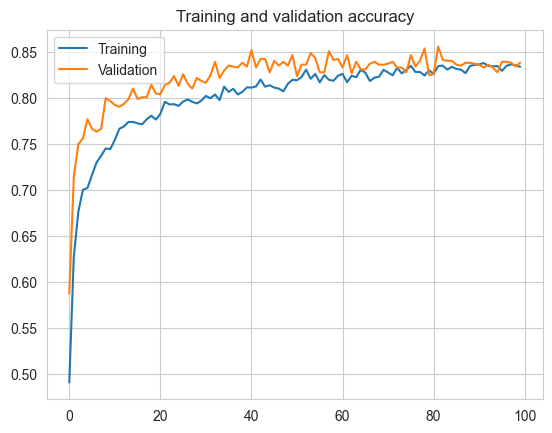

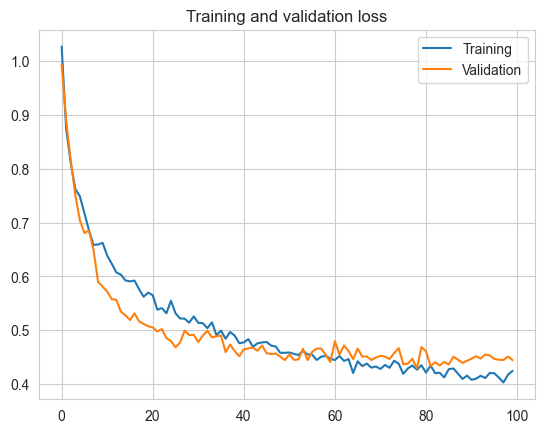

In [12]:
#Plotting the training results
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

# **Training second Model with Alexnet architectur (Model A)**

In [13]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(96, 11, strides=4, activation='relu', padding='same', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(3, strides=2),
    tf.keras.layers.Conv2D(256, 5, strides=4, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(3, strides=2),
    tf.keras.layers.Conv2D(384, 3, strides=4, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(384, 3, strides=4, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, 3, strides=4, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 38, 38, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 18, 18, 96)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 5, 5, 256)         614656    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 2, 2, 256)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 1, 1, 384)         885120    
                                                                 
 conv2d_11 (Conv2D)          (None, 1, 1, 384)        

In [14]:
from tensorflow.keras.optimizers import Adam
model2.compile(optimizer=Adam(learning_rate=lr_scheduler), loss='categorical_crossentropy', metrics=['accuracy'])

#Training proccess
history2 = model2.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // 32,
    verbose = 2
    # callbacks=[callback]
)

Epoch 1/100
122/122 - 38s - loss: 1.0127 - accuracy: 0.4440 - val_loss: 0.8891 - val_accuracy: 0.4969 - 38s/epoch - 308ms/step
Epoch 2/100
122/122 - 84s - loss: 0.7992 - accuracy: 0.6384 - val_loss: 0.7920 - val_accuracy: 0.6677 - 84s/epoch - 690ms/step
Epoch 3/100
122/122 - 66s - loss: 0.6965 - accuracy: 0.7116 - val_loss: 0.7255 - val_accuracy: 0.7031 - 66s/epoch - 543ms/step
Epoch 4/100
122/122 - 36s - loss: 0.5951 - accuracy: 0.7677 - val_loss: 0.7049 - val_accuracy: 0.7208 - 36s/epoch - 297ms/step
Epoch 5/100
122/122 - 36s - loss: 0.5726 - accuracy: 0.7777 - val_loss: 0.5635 - val_accuracy: 0.7823 - 36s/epoch - 294ms/step
Epoch 6/100
122/122 - 37s - loss: 0.5320 - accuracy: 0.7968 - val_loss: 0.5384 - val_accuracy: 0.7917 - 37s/epoch - 302ms/step
Epoch 7/100
122/122 - 35s - loss: 0.5212 - accuracy: 0.8048 - val_loss: 0.5678 - val_accuracy: 0.7656 - 35s/epoch - 289ms/step
Epoch 8/100
122/122 - 74s - loss: 0.4818 - accuracy: 0.8264 - val_loss: 0.4921 - val_accuracy: 0.8146 - 74s/epo

Text(0.5, 1.0, 'Training and validation loss')

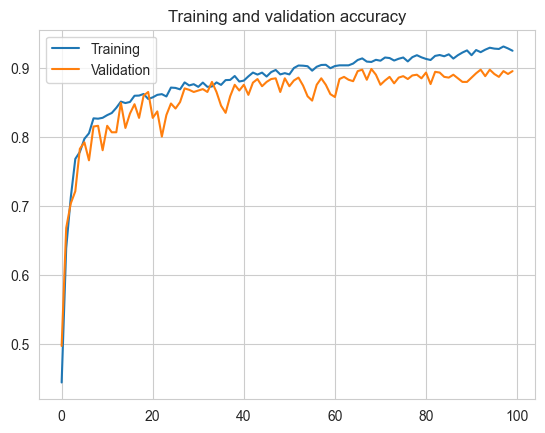

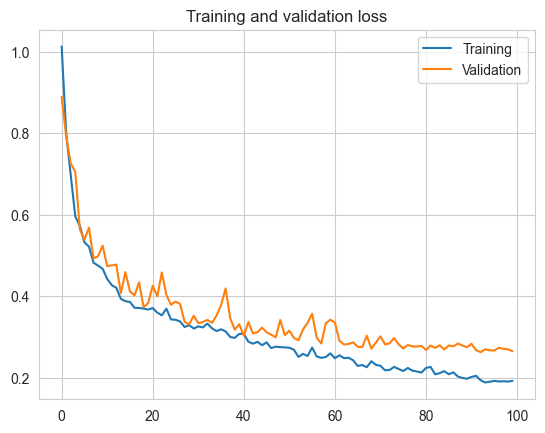

In [15]:
#Plotting the results of the second model
acc2      = history2.history[     'accuracy' ]
val_acc2  = history2.history[ 'val_accuracy' ]
loss2     = history2.history[    'loss' ]
val_loss2 = history2.history['val_loss' ]

epochs2   = range(len(acc2)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs2,     acc2, label='Training')
plt.plot  ( epochs2, val_acc2, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs2,     loss2, label='Training')
plt.plot  ( epochs2, val_loss2, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

# **LeNet Architecture (Model B)** 

In [16]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 146, 146, 6)       456       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 73, 73, 6)        0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 73, 73, 6)         0         
                                                                 
 conv2d_14 (Conv2D)          (None, 69, 69, 16)        2416      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 34, 34, 16)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 34, 34, 16)       

In [17]:
from tensorflow.keras.optimizers import Adam
model3.compile(optimizer=Adam(learning_rate=lr_scheduler), loss='categorical_crossentropy', metrics=['accuracy'])

#Training proccess
history3 = model3.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // 32,
    verbose = 2
    # callbacks=[callback]
)

Epoch 1/100
122/122 - 149s - loss: 1.0283 - accuracy: 0.4767 - val_loss: 0.9354 - val_accuracy: 0.6792 - 149s/epoch - 1s/step
Epoch 2/100
122/122 - 21s - loss: 0.8655 - accuracy: 0.6310 - val_loss: 0.8278 - val_accuracy: 0.6781 - 21s/epoch - 176ms/step
Epoch 3/100
122/122 - 24s - loss: 0.7899 - accuracy: 0.6843 - val_loss: 0.7465 - val_accuracy: 0.7417 - 24s/epoch - 194ms/step
Epoch 4/100
122/122 - 26s - loss: 0.7703 - accuracy: 0.6876 - val_loss: 0.7421 - val_accuracy: 0.7490 - 26s/epoch - 210ms/step
Epoch 5/100
122/122 - 29s - loss: 0.7138 - accuracy: 0.7157 - val_loss: 0.7237 - val_accuracy: 0.7625 - 29s/epoch - 241ms/step
Epoch 6/100
122/122 - 86s - loss: 0.7006 - accuracy: 0.7296 - val_loss: 0.6894 - val_accuracy: 0.7604 - 86s/epoch - 703ms/step
Epoch 7/100
122/122 - 56s - loss: 0.6916 - accuracy: 0.7247 - val_loss: 0.6672 - val_accuracy: 0.7667 - 56s/epoch - 460ms/step
Epoch 8/100
122/122 - 27s - loss: 0.6749 - accuracy: 0.7340 - val_loss: 0.6816 - val_accuracy: 0.7771 - 27s/epoc

Text(0.5, 1.0, 'Training and validation loss')

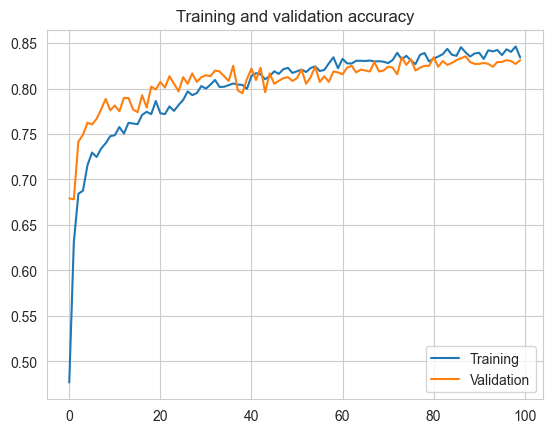

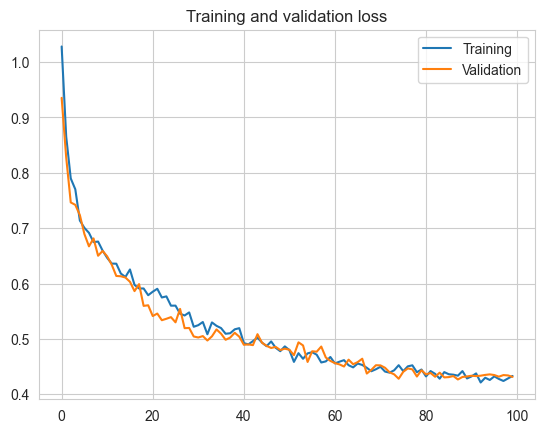

In [18]:
#Plotting the results of the third model
acc3      = history3.history[     'accuracy' ]
val_acc3  = history3.history[ 'val_accuracy' ]
loss3     = history3.history[    'loss' ]
val_loss3 = history3.history['val_loss' ]

epochs3   = range(len(acc3)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs3,     acc3, label='Training')
plt.plot  ( epochs3, val_acc3, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs3,     loss3, label='Training')
plt.plot  ( epochs3, val_loss3, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

# **Comparation**

<Figure size 640x480 with 0 Axes>

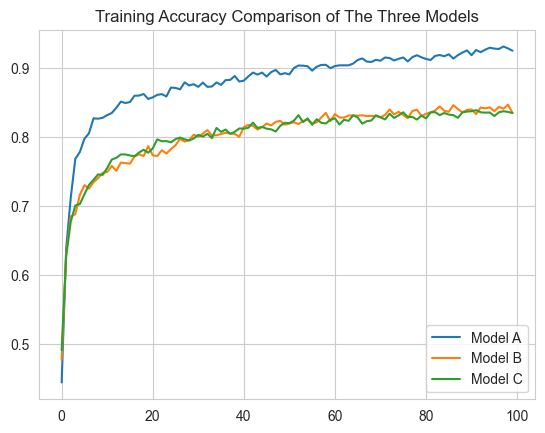

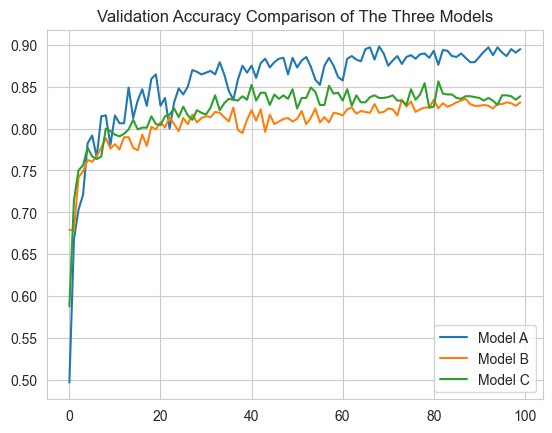

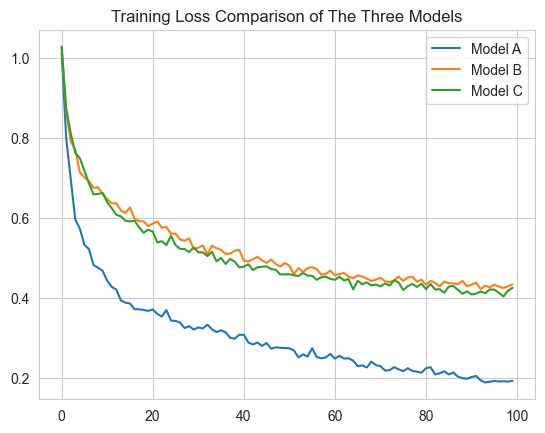

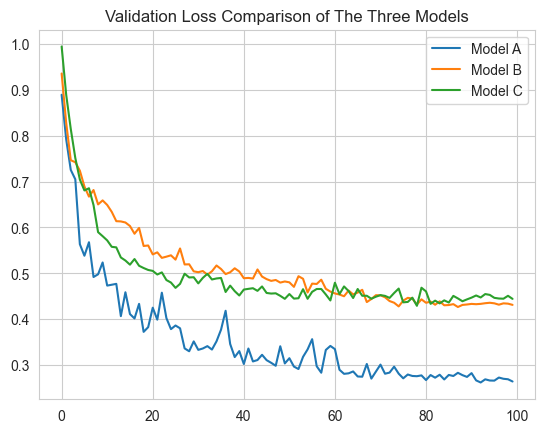

<Figure size 640x480 with 0 Axes>

In [19]:
#------------------------------------------------
# Plot training accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs2,     acc2, label='Model A')
plt.plot  ( epochs3,     acc3, label='Model B')
plt.plot  ( epochs,      acc,  label='Model C')
plt.title ('Training Accuracy Comparison of The Three Models')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs2,     val_acc2, label='Model A')
plt.plot  ( epochs3,     val_acc3, label='Model B')
plt.plot  ( epochs,      val_acc,  label='Model C')
plt.title ('Validation Accuracy Comparison of The Three Models')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training loss per epoch
#------------------------------------------------
plt.plot  ( epochs2,     loss2, label='Model A')
plt.plot  ( epochs3,     loss3, label='Model B')
plt.plot  ( epochs,      loss,  label='Model C')
plt.title ('Training Loss Comparison of The Three Models')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs2,     val_loss2, label='Model A')
plt.plot  ( epochs3,     val_loss3, label='Model B')
plt.plot  ( epochs,      val_loss,  label='Model C')
plt.title ('Validation Loss Comparison of The Three Models')
plt.legend()
plt.figure()

# **Save the the Models**

In [20]:
model.save("Model/Model Gabungan/model_C.h5")
model2.save("Model/Model Gabungan/model_A.h5")
model3.save("Model/Model Gabungan/model_B.h5")